<a href="https://colab.research.google.com/github/Asm3515/DataScience---Heart-Disease/blob/main/LogesticREgression(Heart_Desise_DataSet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Disease Classification Dataset USING LOGESTIC REGRESSION (ACCURACY IMPROVEMENT)

In [1]:
import numpy as np  # Import the NumPy library for linear algebra operations.
import pandas as pd  # Import the Pandas library for data processing and CSV file input/output, such as reading CSV files.


In [2]:
df = pd.read_csv(r"/home/Heart Attack.csv")

In [3]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
df.shape

(1319, 9)

In [6]:
df.size

11871

In [8]:
df.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

In [13]:
df.isnull().any()

age              False
gender           False
impluse          False
pressurehight    False
pressurelow      False
glucose          False
kcm              False
troponin         False
class            False
dtype: bool

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [16]:
df.describe().round(3)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000,1319.000,1319.000,1319.000,1319.000,1319.000,1319.000,1319.000
mean,56.192,0.660,78.337,127.171,72.269,146.634,15.274,0.361
std,13.647,0.474,51.630,26.123,14.034,74.923,46.327,1.155
min,14.000,0.000,20.000,42.000,38.000,35.000,0.321,0.001
25%,47.000,0.000,64.000,110.000,62.000,98.000,1.655,0.006
50%,58.000,1.000,74.000,124.000,72.000,116.000,2.850,0.014
75%,65.000,1.000,85.000,143.000,81.000,169.500,5.805,0.085
max,103.000,1.000,1111.000,223.000,154.000,541.000,300.000,10.300


In [18]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:",numerical_columns)

object_columns = df.select_dtypes(include=['object']).columns
print("\nObject Columns:",object_columns)

Numerical Columns: Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin'],
      dtype='object')

Object Columns: Index(['class'], dtype='object')


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [22]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Bar(x=df[i].value_counts().index, y=df[i].value_counts(),uid =None)])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Count")
    fig.show()

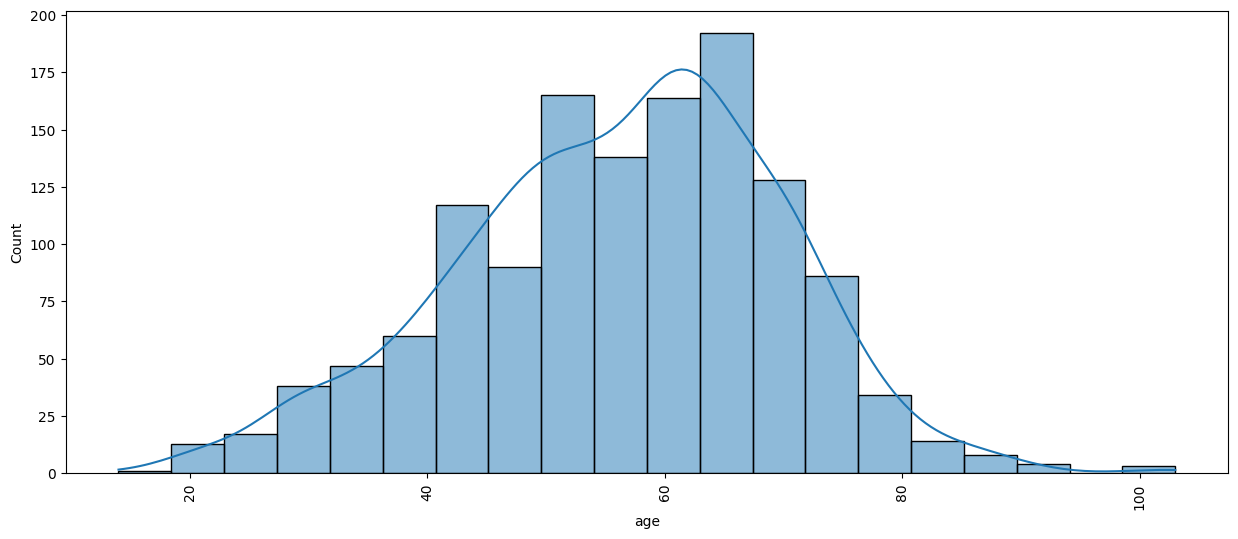

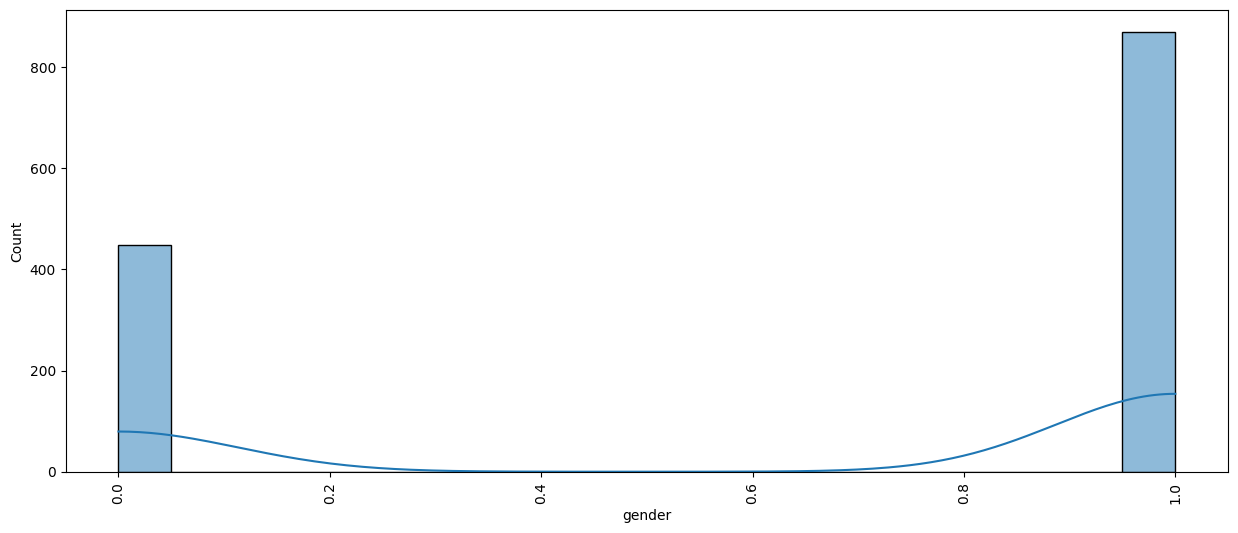

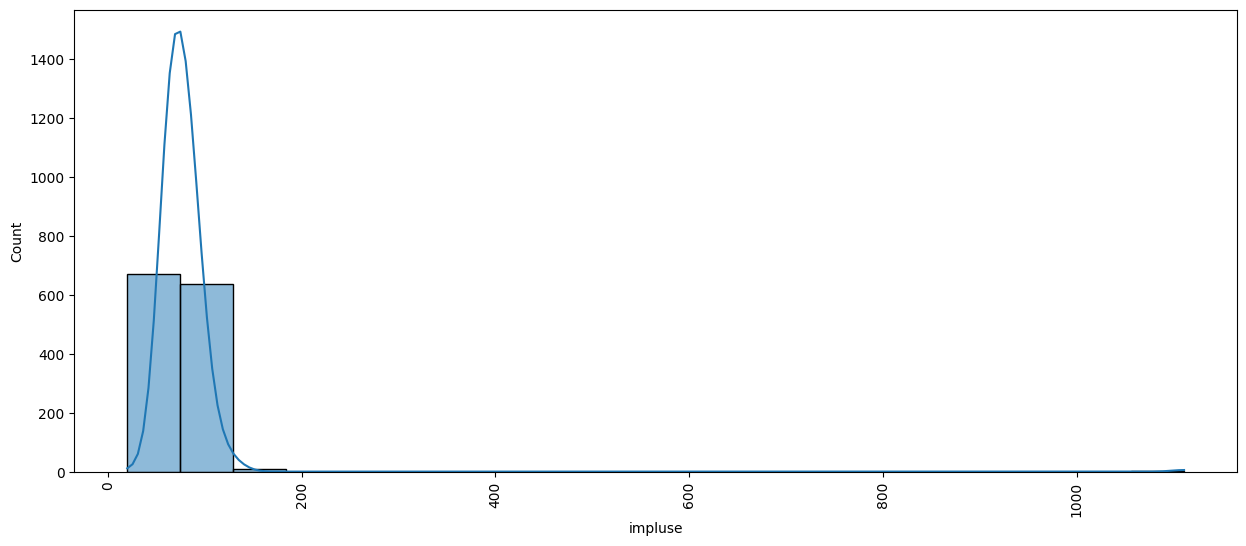

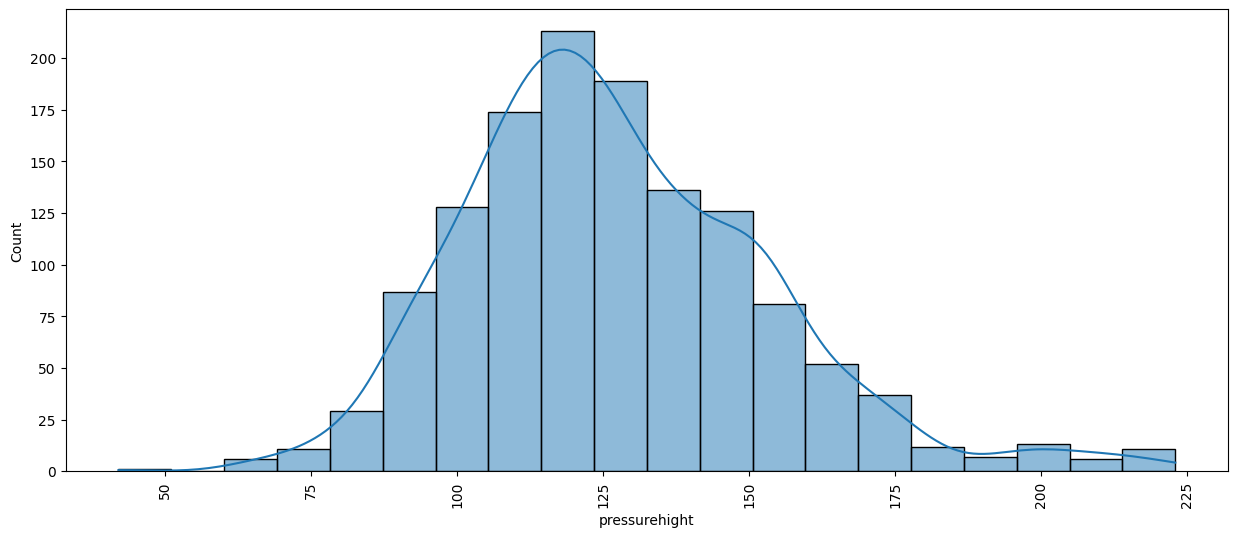

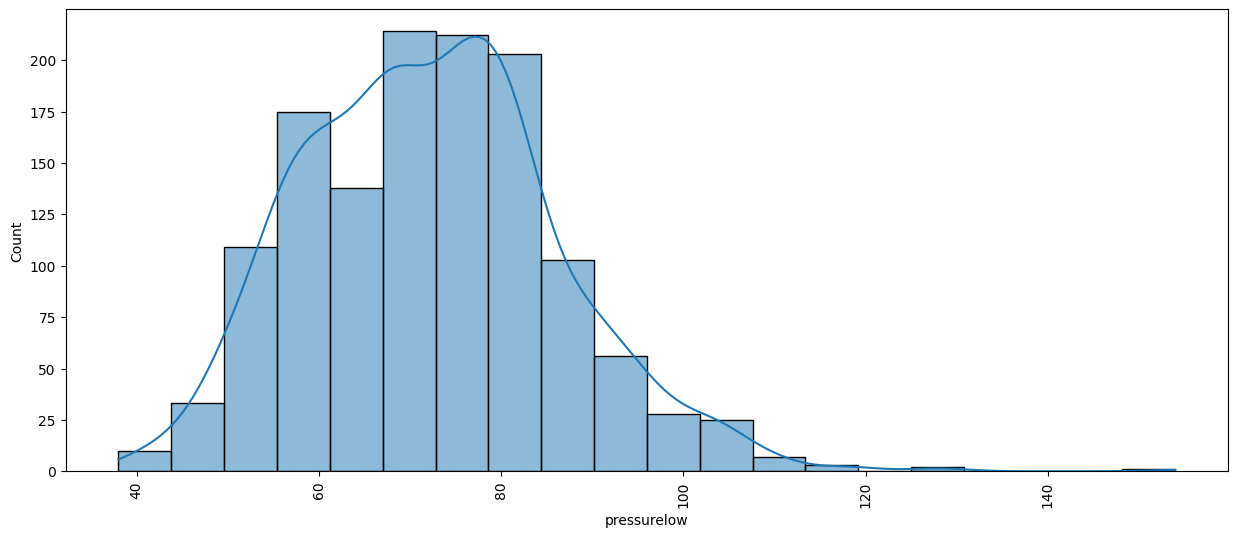

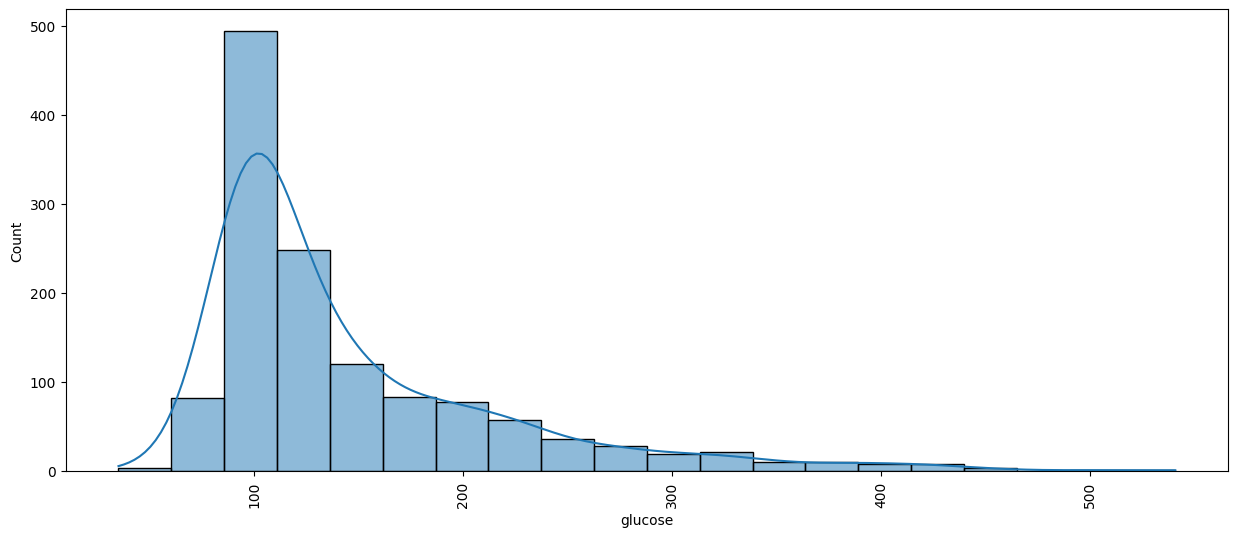

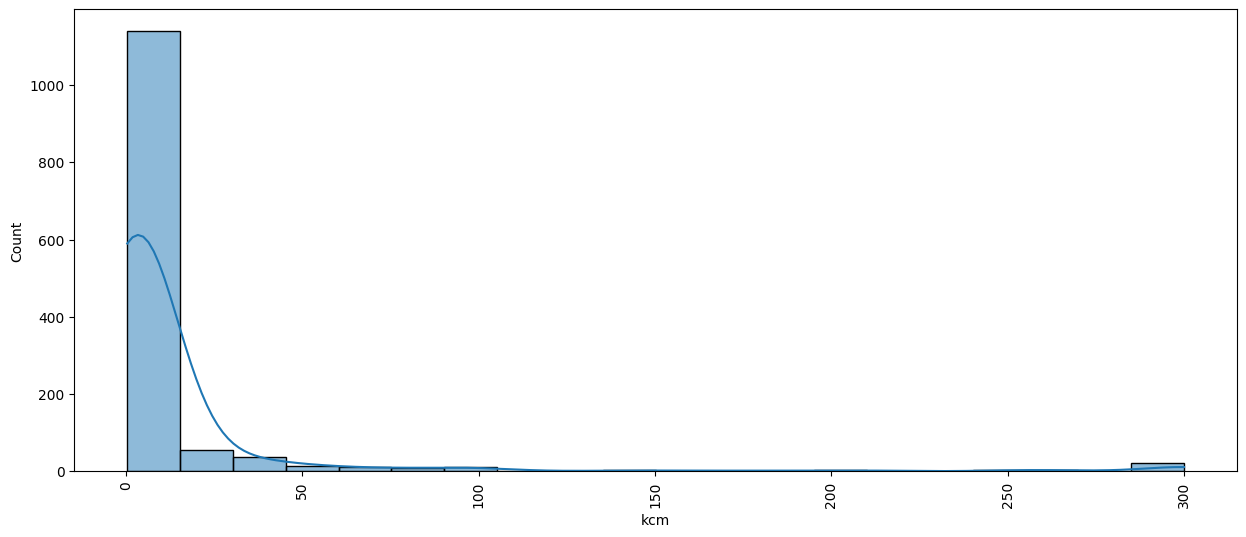

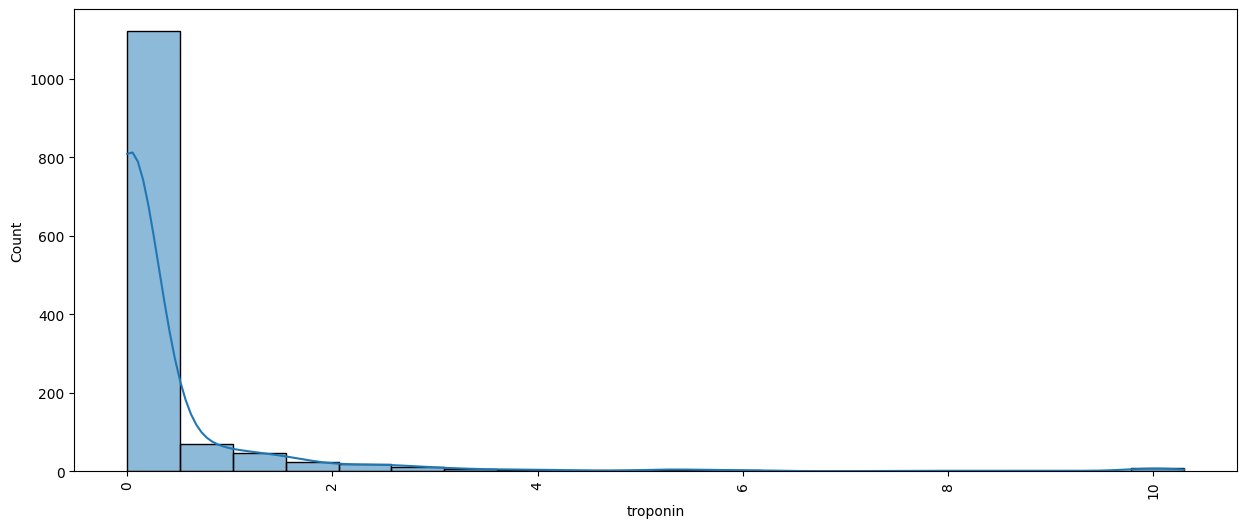

In [24]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

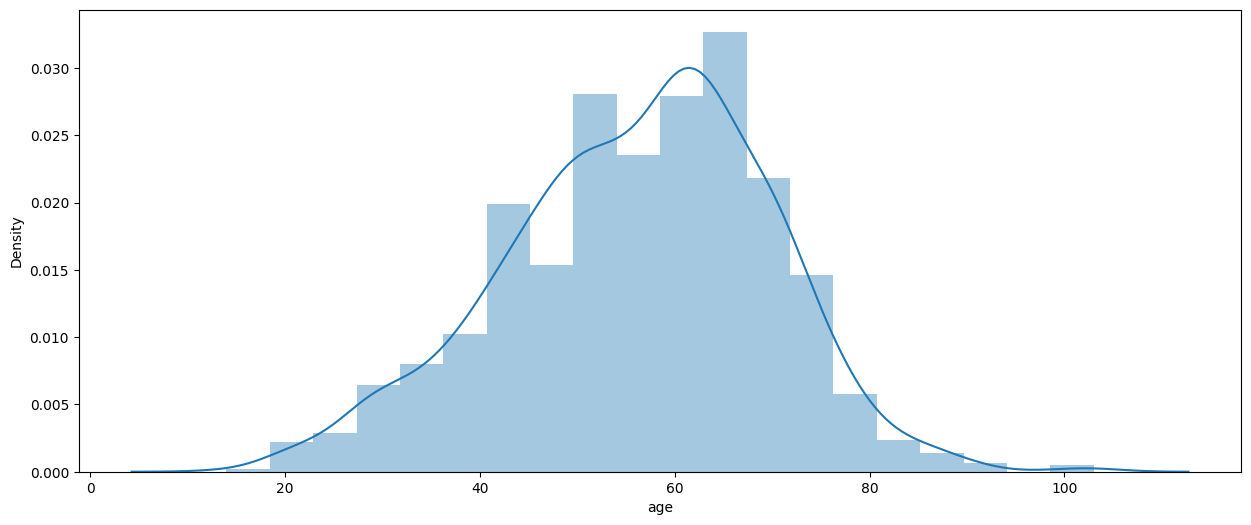

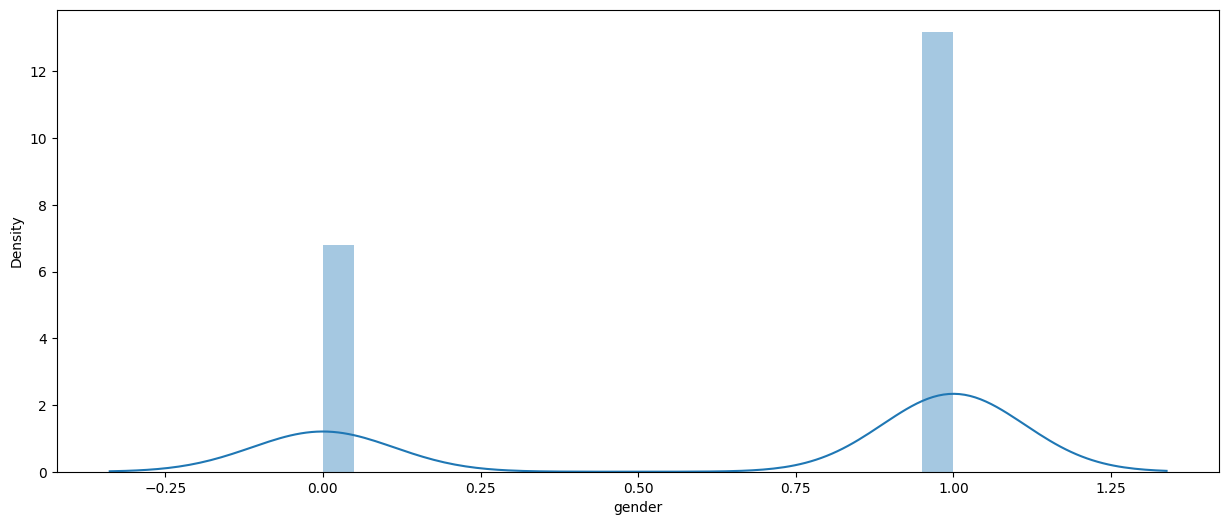

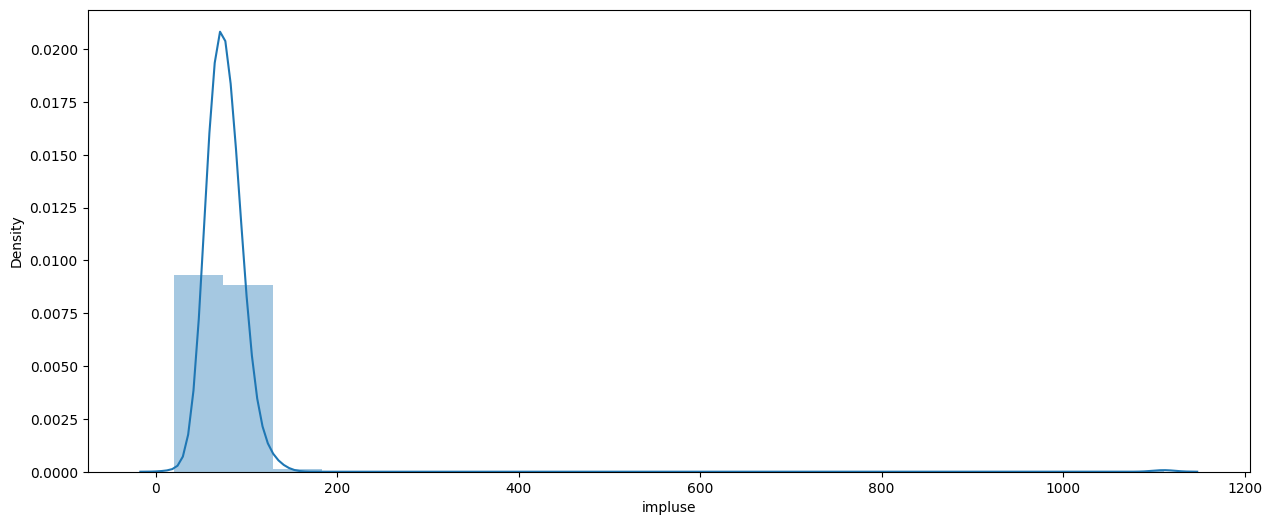

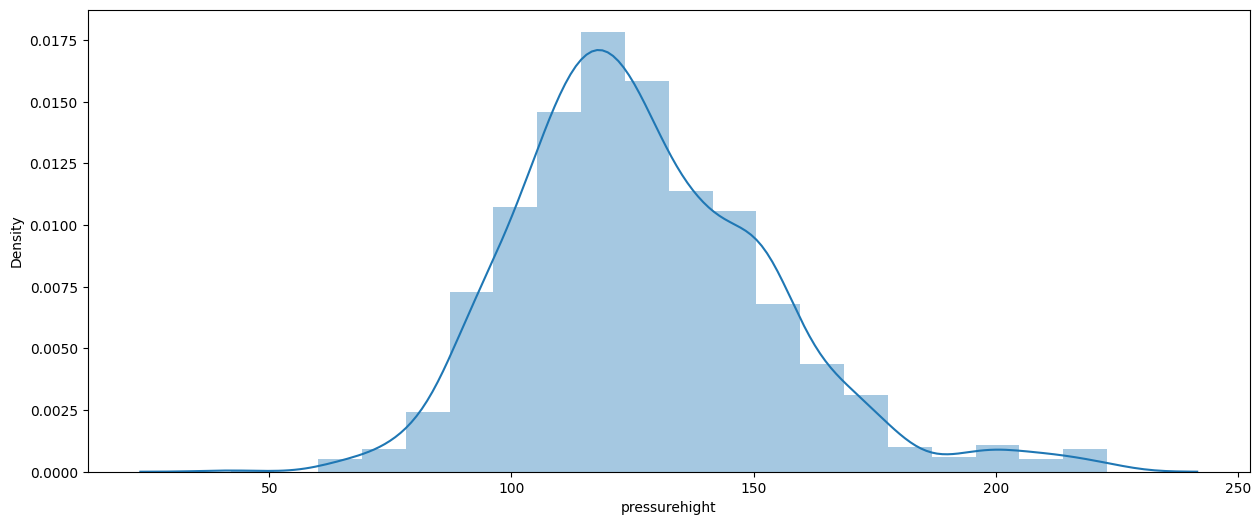

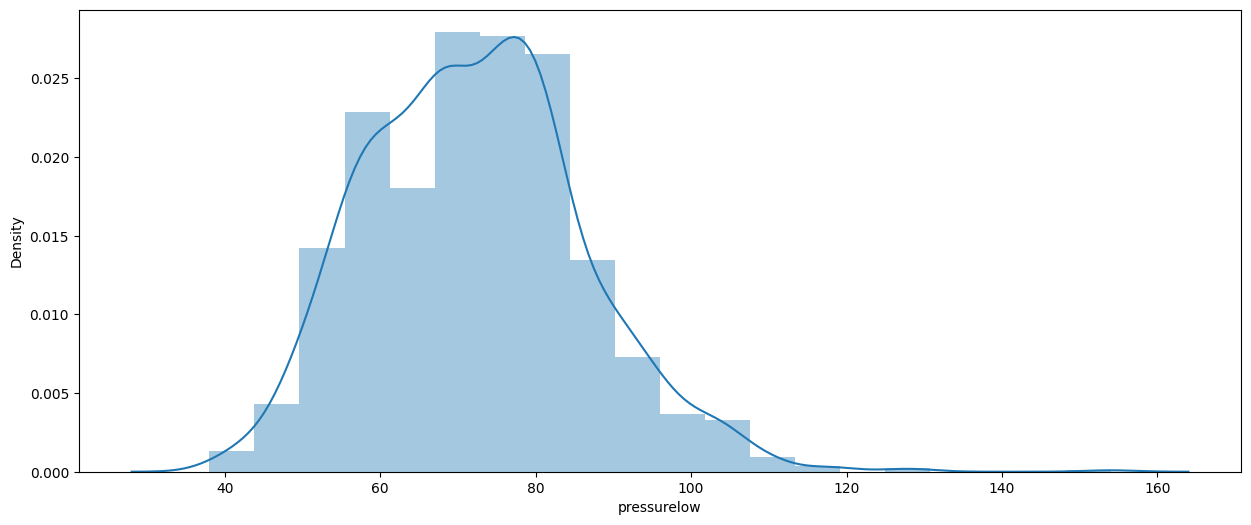

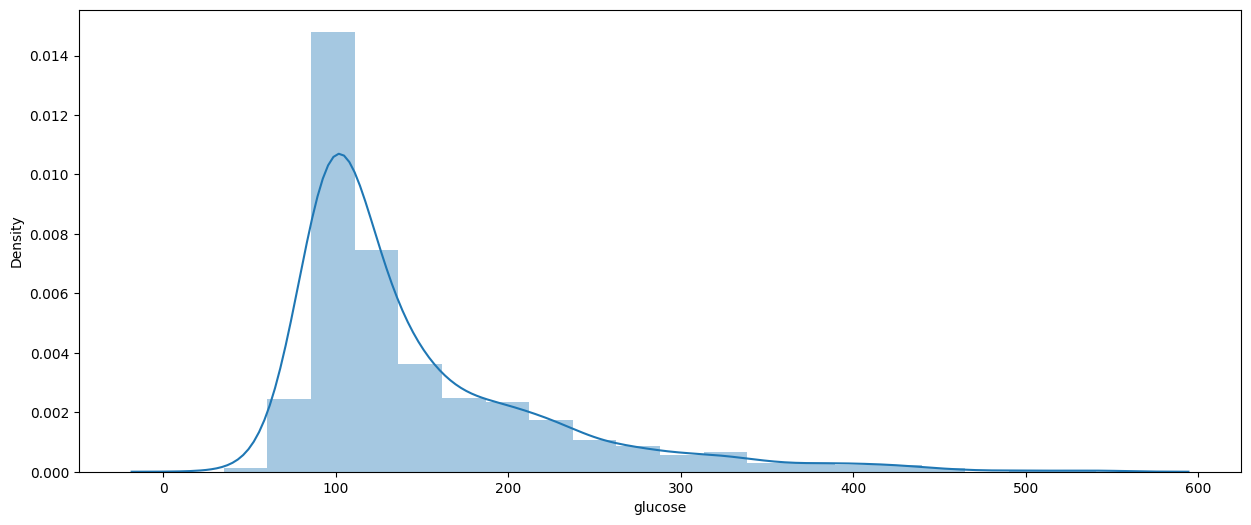

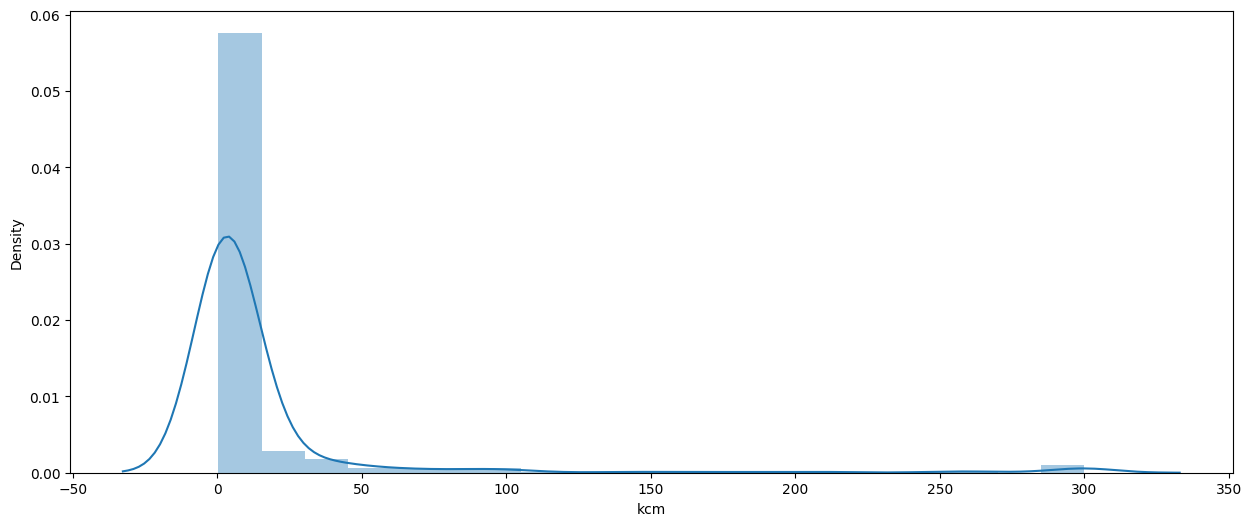

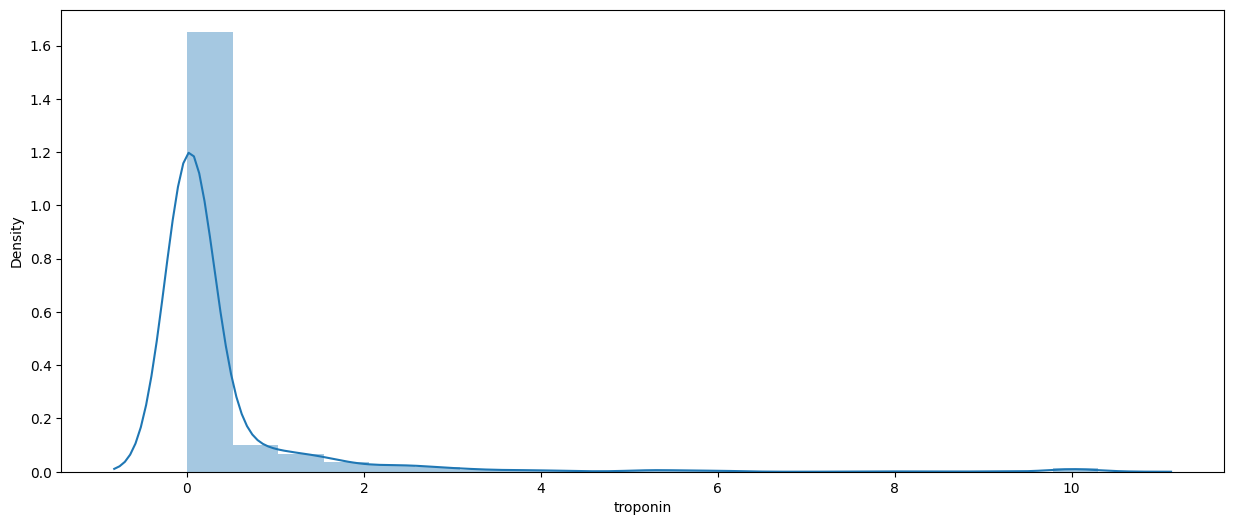

In [25]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde = True, bins = 20)
    plt.xticks(rotation = 0)
    plt.show()

In [26]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Histogram(x=df[i], nbinsx=20)])
    fig.update_layout(
        title=f'Histogram of {i}',
        xaxis_title=i,
        yaxis_title="Count"
    )
    fig.update_traces(marker=dict(line=dict(width=1, color='black')))
    fig.show()

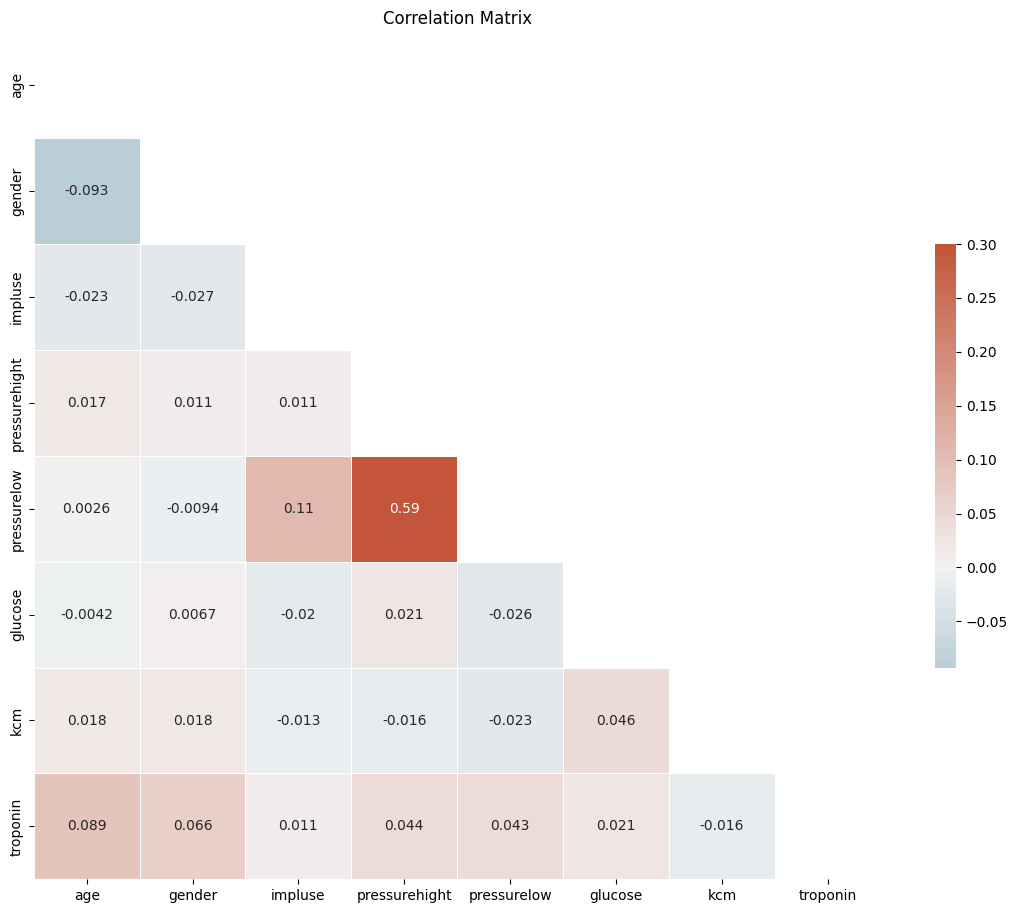

In [28]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(14, 11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [29]:
# Convert the 'class' column to binary values: 'negative' to 0 and 'positive' to 1.
df['class'] = df['class'].map({'negative': 0, 'positive': 1})

# Divide the dataset into features (X) and the target variable (y).
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target variable


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Create a StandardScaler instance called 'scaler.'
scaler = StandardScaler()
# Fit the scaler to the training data and then transform the training data.
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler that was fitted on the training data.
X_test_scaled = scaler.transform(X_test)


In [38]:
model = LogisticRegression()

In [39]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(X_test_scaled)

In [42]:
# Calculate and print the accuracy score by comparing the predicted labels (y_pred) to the actual labels (y_test).
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print a classification report based on the actual labels (y_test) and predicted labels (y_pred).
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and display the confusion matrix based on the actual labels (y_test) and predicted labels (y_pred).
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7992424242424242
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       101
           1       0.82      0.87      0.84       163

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.78       264
weighted avg       0.80      0.80      0.80       264

Confusion Matrix:
[[ 70  31]
 [ 22 141]]


In [44]:
# Perform hyperparameter tuning to find the best parameters for the Logistic Regression model.
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search through.
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create a grid search using cross-validation.
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters found during the grid search.
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}


In [45]:
best_model = LogisticRegression(**best_params)
best_model.fit(X_train_scaled, y_train)

# Make predictions with the best model.
y_pred = best_model.predict(X_test_scaled)

# Calculate and print the accuracy score by comparing the predicted labels (y_pred) to the actual labels (y_test).
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after Hyperparameter Tuning:", accuracy)

Accuracy after Hyperparameter Tuning: 0.8787878787878788


In [46]:
# Generate and print a classification report based on the actual labels (y_test) and predicted labels (y_pred).
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and display the confusion matrix based on the actual labels (y_test) and predicted labels (y_pred).
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       101
           1       0.90      0.90      0.90       163

    accuracy                           0.88       264
   macro avg       0.87      0.87      0.87       264
weighted avg       0.88      0.88      0.88       264

Confusion Matrix:
[[ 85  16]
 [ 16 147]]


In [48]:
# Feature Engineering - Square and Mean of Features
X_train_squared = X_train_scaled ** 2
X_test_squared = X_test_scaled ** 2

X_train_mean = X_train_scaled.mean(axis=1).reshape(-1, 1)
X_test_mean = X_test_scaled.mean(axis=1).reshape(-1, 1)

# Combine the original and engineered features
X_train_combined = np.hstack((X_train_scaled, X_train_squared, X_train_mean))
X_test_combined = np.hstack((X_test_scaled, X_test_squared, X_test_mean))

In [49]:
# Train a new model with the engineered features.
model_with_engineered_features = LogisticRegression(**best_params)
model_with_engineered_features.fit(X_train_combined, y_train)

# Make predictions with the model using engineered features.
y_pred = model_with_engineered_features.predict(X_test_combined)

# Calculate and print the accuracy score by comparing the predicted labels (y_pred) to the actual labels (y_test).
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Engineered Features:", accuracy)


Accuracy with Engineered Features: 0.821969696969697


In [50]:
print("Classification Report with Engineered Features:")
print(classification_report(y_test, y_pred))

# Calculate and display the confusion matrix based on the actual labels (y_test) and predicted labels (y_pred).
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix with Engineered Features:")
print(conf_matrix)

Classification Report with Engineered Features:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       101
           1       0.83      0.89      0.86       163

    accuracy                           0.82       264
   macro avg       0.82      0.80      0.81       264
weighted avg       0.82      0.82      0.82       264

Confusion Matrix with Engineered Features:
[[ 72  29]
 [ 18 145]]


In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_model = LogisticRegression()
svm_model = SVC(kernel='linear', probability=True)  # We use probability=True for SVC to enable probability estimates


In [54]:
# Fit the models on the training data
rf_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [56]:
# Make predictions using each model
rf_predictions = rf_model.predict_proba(X_test)
logistic_predictions = logistic_model.predict_proba(X_test)
svm_predictions = svm_model.predict_proba(X_test)

In [58]:
# Create a voting ensemble classifier with soft voting
voting_classifier = VotingClassifier(
    estimators=[
        ('Random Forest', rf_model),
        ('Logistic Regression', logistic_model),
        ('SVM', svm_model)
    ],
    voting='soft'  # 'soft' for weighted voting based on class probabilities
)

In [59]:
# Fit the ensemble model on the training data
voting_classifier.fit(X_train, y_train)


VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Logistic Regression', LogisticRegression()),
                             ('SVM', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [60]:
# Make predictions using the ensemble model
ensemble_predictions = voting_classifier.predict(X_test)

In [61]:
# Evaluate the ensemble model's accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy with Soft Voting:", ensemble_accuracy)

Ensemble Accuracy with Soft Voting: 0.9431818181818182


In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# Calculate and print the classification report based on the actual labels (y_test) and predicted labels (ensemble_predictions).
classification_rep = classification_report(y_test, ensemble_predictions)
print("Classification Report for Ensemble:")
print(classification_rep)

Classification Report for Ensemble:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       101
           1       0.95      0.96      0.95       163

    accuracy                           0.94       264
   macro avg       0.94      0.94      0.94       264
weighted avg       0.94      0.94      0.94       264



In [64]:
# Calculate and display the confusion matrix based on the actual labels (y_test) and predicted labels (ensemble_predictions).
conf_matrix = confusion_matrix(y_test, ensemble_predictions)
print("Confusion Matrix for Ensemble:")
print(conf_matrix)

Confusion Matrix for Ensemble:
[[ 92   9]
 [  6 157]]


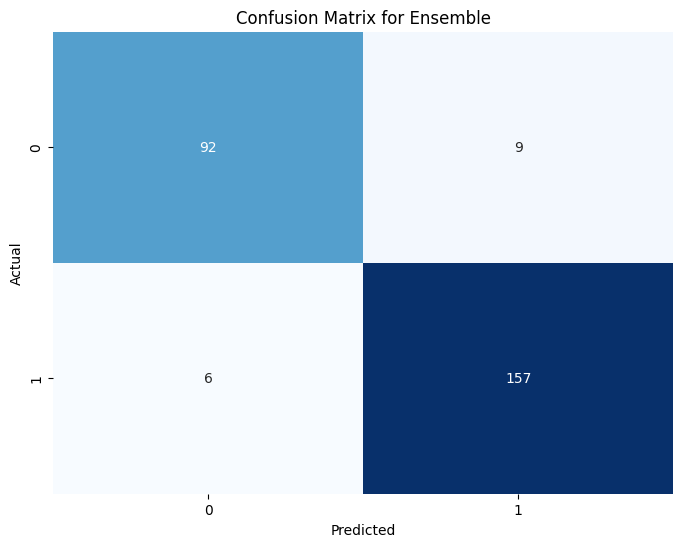

In [65]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ensemble')
plt.show()
